<a href="https://colab.research.google.com/github/AndreaCedenoR/Clasificacion-lineal-con-el-Perceptron/blob/main/IAAA_P3_Cede%C3%B1oReis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Sección I – Cargar el dataset “wine” de Scikit-learn

In [ ]:
# Importar librerías
from sklearn.datasets import load_wine
import pandas as pd

# Cargar el dataset wine
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Mostrar las primeras filas
# df.head()
df.sample(10)  # Muestra 10 filas aleatorias, de cualquier clase



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
86,12.16,1.61,2.31,22.8,90.0,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495.0,1
38,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0,0
91,12.00,1.51,2.42,22.0,86.0,1.45,1.25,0.50,1.63,3.60,1.05,2.65,450.0,1
121,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0,1
44,13.05,1.77,2.10,17.0,107.0,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885.0,0
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0,2
31,13.58,1.66,2.36,19.1,106.0,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515.0,0
93,12.29,2.83,2.22,18.0,88.0,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290.0,1


Se importa el conjunto de datos wine que contiene información sobre vinos de 3 clases.

Se crea un DataFrame de pandas con las características y la etiqueta (target), que representa el tipo de vino (0, 1 o 2).

In [ ]:
# df['target'].value_counts()


✅ Sección II – Seleccionar las características deseadas

In [ ]:
features = ['alcohol', 'magnesium', 'color_intensity']
df_selected = df[features + ['target']]

# df_selected.head()
df_selected.sample(10)

,alcohol,magnesium,color_intensity,target
77,11.84,112.0,2.65,1
101,12.60,88.0,2.45,1
149,13.08,113.0,9.40,2
95,12.47,162.0,2.60,1
4,13.24,118.0,4.32,0
35,13.48,100.0,5.10,0
59,12.37,88.0,1.95,1
94,11.62,98.0,3.25,1
48,14.10,103.0,6.20,0
90,12.08,81.0,2.40,1


Nos enfocamos en 3 características: alcohol, magnesium y color_intensity, como base para entrenar un clasificador.

Estas características son numéricas y ayudan a diferenciar los tipos de vino.

✅ Sección III – Seleccionar dos clases para clasificación binaria

In [ ]:
df_binary = df_selected[df_selected['target'].isin([0, 1])]

# Variables predictoras y objetivo
X = df_binary[features].values
y = df_binary['target'].values

El dataset wine tiene 3 clases (0, 1, 2), pero necesitamos una clasificación binaria, así que seleccionamos solo las clases 0 y 1.

X es la matriz de características, e y es el vector de etiquetas (0 o 1).

✅ Sección IV - Divida la data en dos subconjuntos: uno de entrenamiento y uno de prueba

In [ ]:
from sklearn.model_selection import train_test_split

# División de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Se dividen los datos de entrenamiento manteniendo proporcionalidad

✅ Sección V - Usando los datos de entrenamiento, implemente un clasificador binario, basado en el algoritmo del Perceptrón Simple.

In [ ]:
import numpy as np

# Convertir etiquetas de 0 y 1 a -1 y 1 para compatibilidad con el algoritmo
y_train_bin = np.where(y_train == 0, -1, 1)

# Inicializar pesos y sesgo
weights = np.zeros(X_train.shape[1])
bias = 0

# Hiperparámetros
learning_rate = 0.01
epochs = 100

# Entrenamiento
for epoch in range(epochs):
    for xi, target in zip(X_train, y_train_bin):
        activation = np.dot(xi, weights) + bias
        prediction = np.sign(activation)
        if prediction != target:
            weights += learning_rate * target * xi
            bias += learning_rate * target


Utilizando el algoritmo de clasificación binaria supervisado, donde su fórmula es: $$y
^
​
=sign(w^
T
⋅x+b)$$

 donde:

**𝑥**
es el vector de características de entrada.

**𝑤**
son los pesos del modelo.

**𝑏**
es el sesgo (bias).

**sign**
**(**
**)**
devuelve +1 o -1 (nosotros adaptaremos a 0 o 1).

Esto último porque el Perceptrón de Rosenblatt toma decisiones usando el signo de esta expresión:

$$y^
​
 =sign(w⋅x+b)$$

Y luego actualiza los pesos solo si se equivoca usando esta regla:

$$𝑤
←
𝑤
+
𝜂
⋅
𝑦
⋅
𝑥$$

Donde:

**𝑦**
es la etiqueta real, que debe ser -1 o 1

**𝜂**
es la tasa de aprendizaje

**𝑥**
es el vector de características

Si
**𝑦
∈
{
0
,
1
}
y∈{0,1}**, esta fórmula no funciona correctamente, porque por ejemplo:

Si
**𝑦
=
0
y=0**, entonces
**𝑦
⋅
𝑥
=
0
y⋅x=0**, y los pesos no se actualizan nunca.

✅ Sección VI - Usando los datos de prueba, evalue el desempeño del algoritmo y muéstrelo a través de una matriz de confusión.

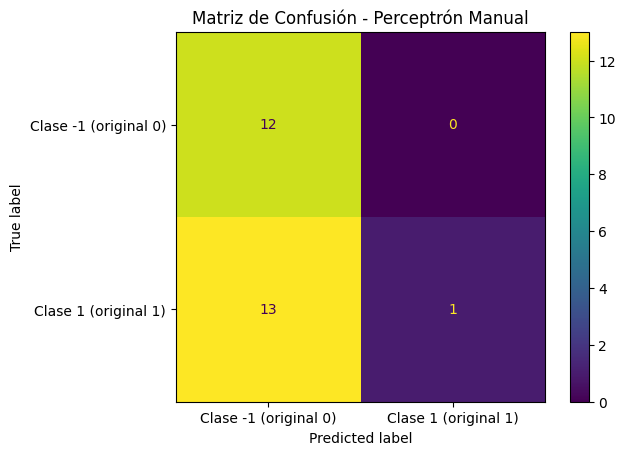

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convertir etiquetas de prueba a -1 y 1
y_test_bin = np.where(y_test == 0, -1, 1)

# Función de predicción
def predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    return np.where(linear_output >= 0, 1, -1)  # Aplicar función escalón

# Predecir sobre los datos de prueba
y_pred_bin = predict(X_test, weights, bias)

# Calcular y mostrar matriz de confusión
cm = confusion_matrix(y_test_bin, y_pred_bin)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Clase -1 (original 0)", "Clase 1 (original 1)"])
disp.plot()
plt.title("Matriz de Confusión - Perceptrón Manual")
plt.grid(False)
plt.show()


**Importación de librerías:**
Se importan las funciones confusion_matrix y ConfusionMatrixDisplay de sklearn.metrics para calcular y visualizar la matriz de confusión. También se importa matplotlib.pyplot para personalizar la visualización.

**Conversión de etiquetas:**
Como el Perceptrón clásico trabaja con etiquetas binarias -1 y 1, se transforman las etiquetas originales de prueba (0 y 1) en -1 y 1 respectivamente.

**Definición de la función de predicción:**
Se implementa la función predict, que aplica la regla del Perceptrón:

**Calcula la salida lineal:
𝑤
⋅
𝑥
+
𝑏**


**Aplica la función escalón:** devuelve 1 si la salida es mayor o igual que 0, y -1 en caso contrario.

**Predicciones sobre el conjunto de prueba:**
Se usa la función anterior junto con los pesos y el sesgo aprendidos durante el entrenamiento para predecir las etiquetas de los datos de prueba.

**Cálculo y visualización de la matriz de confusión:**
Se compara el vector de etiquetas verdaderas con el de predicciones, para generar una matriz de confusión. Luego, se visualiza gráficamente, indicando cuántas predicciones fueron correctas y cuántas incorrectas para cada clase.

✅ Sección VII - Usando los datos de prueba, evalue el desempeño del algoritmo y muéstrelo a través de una matriz de confusión.


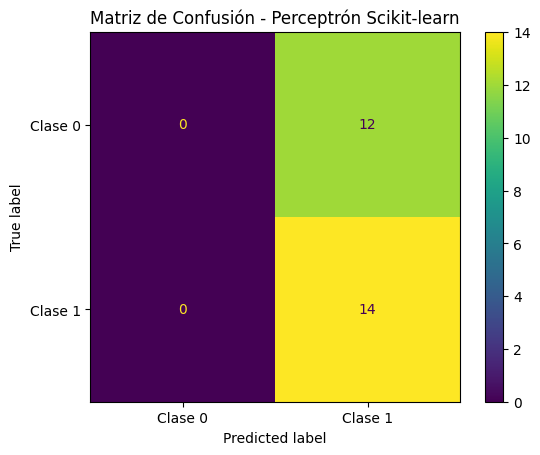

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Crear el modelo de Perceptrón
clf = Perceptron(max_iter=1000, eta0=0.1, random_state=42)

# Entrenar el modelo con los datos originales (etiquetas 0 y 1)
clf.fit(X_train, y_train)

# Realizar predicciones sobre los datos de prueba
y_pred_sklearn = clf.predict(X_test)

# Calcular y mostrar matriz de confusión
cm = confusion_matrix(y_test, y_pred_sklearn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Clase 0", "Clase 1"])
disp.plot()
plt.title("Matriz de Confusión - Perceptrón Scikit-learn")
plt.grid(False)
plt.show()


En esta sección se utiliza la clase Perceptron de scikit-learn, una implementación optimizada del algoritmo del Perceptrón para clasificación supervisada. A continuación se describen los pasos principales:

**Creación del modelo:**
Se inicializa un objeto de tipo Perceptron con:

*max_iter=1000:* número máximo de iteraciones para el entrenamiento.

*eta0=0.1:* tasa de aprendizaje.

*random_state=42:* semilla para asegurar la reproducibilidad de los resultados.

**Entrenamiento:**
Se entrena el modelo utilizando X_train y y_train. A diferencia de nuestro Perceptrón manual, aquí no es necesario convertir las etiquetas a -1 y 1; scikit-learn puede trabajar directamente con 0 y 1.

**Predicción:**
Se usan los datos de prueba X_test para predecir las etiquetas correspondientes (y_pred_sklearn).

**Evaluación con matriz de confusión:**
Se calcula la matriz de confusión, que muestra cómo el modelo clasifica cada clase. Esto permite comparar visualmente su rendimiento con el Perceptrón manual.